# 準備

[【Python/OpenCV】赤・緑・青色の検出（HSV色空間）](https://algorithm.joho.info/programming/python/opencv-color-detection/)<br>
[Python,OpenCVで二値画像から白と黒の面積比を算出](https://techtech-sorae.com/pythonopencv%E3%81%A7%E4%BA%8C%E5%80%A4%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E7%99%BD%E3%81%A8%E9%BB%92%E3%81%AE%E9%9D%A2%E7%A9%8D%E6%AF%94%E3%82%92%E7%AE%97%E5%87%BA/)

In [54]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 赤色の検出
def detect_red_color(img_path):
    # 入力画像の読み込み
    img = cv2.imread(img_path)
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 赤色のHSVの値域1
    hsv_min = np.array([0,64,0])
    hsv_max = np.array([30,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
    hsv_min = np.array([150,64,0])
    hsv_max = np.array([179,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色領域のマスク（255：赤色、0：赤色以外）    
    mask = mask1 + mask2

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    
#     masked_img = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)
#     plt.imshow(masked_img)
#     plt.show()
    

    return mask, masked_img,calc_black_whiteArea(mask)

In [63]:
red_mask, red_masked_img,num = detect_red_color("/Users/obara/Downloads/image.png")

In [64]:
def calc_black_whiteArea(bw_image):
    image_size = bw_image.size
    whitePixels = cv2.countNonZero(bw_image)
    blackPixels = bw_image.size - whitePixels
 
    whiteAreaRatio = (whitePixels/image_size)*100#[%]
    blackAreaRatio = (blackPixels/image_size)*100#[%]
#     print("White Area [%] : ", whiteAreaRatio)
#     print("Black Area [%] : ", blackAreaRatio)
    return whitePixels/image_size

In [70]:
#上全部まとめたやつ
def red_check(file_path):
    if detect_red_color(file)[2]>0.003:
        return True
    else:
        return False

In [71]:
files = glob.glob("/Users/obara/Downloads/test/*")
for file in files:
    print(red_check(file))

False
False
False
False
False
False
False
False
False
False
True
False
False
False
False


In [65]:
calc_black_whiteArea(red_mask)

0.009878263072076494

In [66]:
import glob

files = glob.glob("/Users/obara/Downloads/test/*")
for file in files:
    print(detect_red_color(file)[2])
    #print(detect_red_color(file)[2])
    if detect_red_color(file)[2]>0.003:
        print("あった！！！")
        #print(detect_red_color(file)[2])
    print("------------------")

0.0
------------------
0.0
------------------
0.0006176586477535329
------------------
0.0007161403211695313
------------------
0.0006358565276453076
------------------
0.00031934477965210204
------------------
0.00022929099506094802
------------------
0.000731981981981982
------------------
0.0
------------------
0.0007307270734380709
------------------
0.007884403761504602
あった！！！
------------------
0.0
------------------
0.00010169164043869773
------------------
0.00030856744211006464
------------------
4.691531785127844e-05
------------------


# 画像を歪み補正

In [87]:
input_dir="/Users/obara/Downloads/prescription_data_jpeg/*" #画像群が置いてあるフォルダを指定
output_dir="/Users/obara/Downloads/test/"#選択した画像をおきたい場所を指定
#番号を指定
#num_list=[28,119,137,143,149,162,179,193,273,338,384,399,453,462,483,486,489,531,546,683,709,711,727,728,787,798,909,985,1023,1515]

1201
238


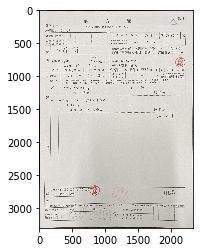

/Users/obara/Downloads/prescription_data_jpeg/photo-238.jpeg
392


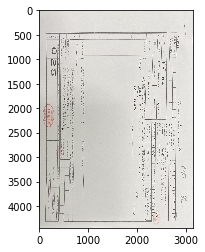

/Users/obara/Downloads/prescription_data_jpeg/photo-392.jpeg
668


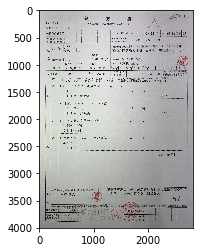

/Users/obara/Downloads/prescription_data_jpeg/photo-668.jpeg
687
404


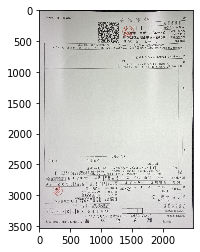

/Users/obara/Downloads/prescription_data_jpeg/photo-404.jpeg
957


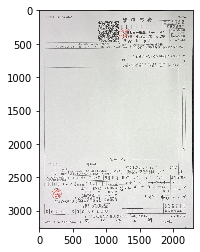

/Users/obara/Downloads/prescription_data_jpeg/photo-957.jpeg
812


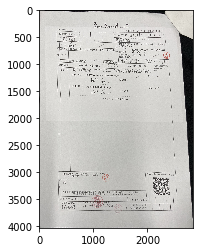

/Users/obara/Downloads/prescription_data_jpeg/photo-812.jpeg
541
1128


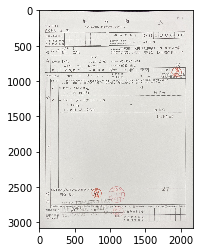

/Users/obara/Downloads/prescription_data_jpeg/photo-1128.jpeg


In [99]:
files = glob.glob(input_dir)
for file in files[:10]:
    print(file[52:-5])
    num=file[52:-5]
    
    try:
        img_array=path_to_array(file)
        waku_detected=waku_detection(img_array)[0]
        yugami_modified=yugami(waku_detected)
        plt.imshow(yugami_modified)
        plt.show()
        print(file)
        image_array_save(yugami_modified,num)
    except:
        pass

In [91]:
path_to_array("/Users/obara/Downloads/prescription_data_jpeg/photo-1201.jpeg")

error: OpenCV(3.4.5) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [98]:
#関数を定義
def image_array_save(img_array,num):
    #img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    plt.imsave(output_dir+"photo-"+str(num)+".jpeg",img_array)
    return

In [ ]:
for num in tqdm(num_list):
    url=input_dir+"photo-"+str(num)+".jpeg"
    try:
        image_save(url)
    except:
        pass

# 関数

In [45]:
#------------------------------
#輪郭を検出する。
def waku_detection(img):
    ''' 
    input:画像のarray
    output:元の画像のarray,補正前の4隅の座標,補正前の横の長さ
    '''
    #画像をグレースケール化
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #閾値を180にして2値化
    threshold = 105
    ret, img_thresh = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)

    #輪郭を取り出している
    img_1, contours, hierarchy = cv2.findContours(img_thresh , cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #mensekiリストに輪郭を追加していっている。
    menseki=[ ]

    for i in range(0, len(contours)):
        menseki.append([contours[i],cv2.contourArea(contours[i])])

    menseki.sort(key=lambda x: x[1], reverse=True)

    #一番面積が大きいものを取り出している。
    cnt = menseki[0][0]

    #輪郭のギザギザを無くしている
    epsilon = 0.1*cv2.arcLength(cnt,True)
    #approxに隅の四点の座標が入っている
    approx = cv2.approxPolyDP(cnt,epsilon,True)

    #ギザギザをなくした後の描画
    #img3=cv2.drawContours(img, approx, 0,(0, 0, 255),10)

    #輪郭の表をリストにして、順番を整理
    approx=approx.tolist()

    left = sorted(approx,key=lambda x:x[0]) [:2]
    right = sorted(approx, key=lambda x: x[0])[2:]
    
    left_down= sorted(left,key=lambda x:x[0][1]) [0]
    left_up= sorted(left,key=lambda x:x[0][1]) [1]

    right_down= sorted(right,key=lambda x:x[0][1]) [0]
    right_up= sorted(right,key=lambda x:x[0][1]) [1]

    #補正前の角の座標
    perspective1 = np.float32([left_down, right_down, right_up, left_up])
    #補正後の横の長さ
    width = right_down[0][0] - left_down[0][0]
    return img,perspective1,width

#------------------------------
def yugami(image_array):
    '''歪み補正
    input:画像のPath
    output:歪み補正した画像のarray
    '''
    #枠検出した結果をwaku_detection_resultに格納
    waku_detection_result=waku_detection(image_array)
    img = waku_detection_result[0]
    perspective1 = waku_detection_result[1]
    width = waku_detection_result[2]
    #補正後の縦の長さ
    height=width*2340//1654
    
    perspective2 = np.float32([[0, 0],[width, 0],[width, height],[0, height]])

    #変換に必要な行列
    psp_matrix = cv2.getPerspectiveTransform(perspective1,perspective2)
    #変換後
    #img_psp = cv2.warpPerspective(img, psp_matrix, (1654, 2340))
    img_psp = cv2.warpPerspective(img, psp_matrix, (width, height))
    return img_psp


#------------------------------
def path_to_array(img_path):
    '''
    画像pathを画像arrayに変換する
    input:画像path
    output:array
    '''
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img